# COVID-19 Data Analysis Project using Python

**Dataset Source**: [COVID-19 Dataset](https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv)  
In this project, we will perform various steps of data analysis including:
- Data loading
- Data understanding (high and low level)
- Cleaning
- Aggregation
- Feature Engineering
- Visualization

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### **Step 1:** Import Dataset
##### (a) Load dataset

In [10]:
url = "https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv"
df = pd.read_csv(url)

##### (b) Display first 5 rows

In [13]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,31/12/19,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,01/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,02/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,03/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,04/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


#### **Step 2:** High Level Data Understanding
##### (a) Number of rows and columns

In [36]:
print("Shape of dataset:", df.shape)

Shape of dataset: (57394, 49)


##### (b) Data types of columns

In [41]:
print("Data types:\n", df.dtypes)

Data types:
 iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million             float64
weekly_icu_admissions

##### (c) Info & describe

In [47]:
print("\nInfo:")
df.info()

print("\nDescribe:")
df.describe()


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57394 entries, 0 to 57393
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            57071 non-null  object 
 1   continent                           56748 non-null  object 
 2   location                            57394 non-null  object 
 3   date                                57394 non-null  object 
 4   total_cases                         53758 non-null  float64
 5   new_cases                           56465 non-null  float64
 6   new_cases_smoothed                  55652 non-null  float64
 7   total_deaths                        44368 non-null  float64
 8   new_deaths                          56465 non-null  float64
 9   new_deaths_smoothed                 55652 non-null  float64
 10  total_cases_per_million             53471 non-null  float64
 11  new_cases_per_million             

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,5.375800e+04,56465.000000,55652.000000,4.436800e+04,56465.000000,55652.000000,53471.000000,56401.000000,55587.000000,44096.000000,...,50367.000000,33571.000000,51013.000000,52881.000000,39669.000000,39156.000000,24176.000000,45936.000000,56336.000000,49247.000000
mean,1.677974e+05,1953.576941,1920.431953,6.858639e+03,47.054317,46.835439,3139.099982,39.344804,38.403211,95.335293,...,20620.172071,12.435453,252.646642,8.070269,10.741569,32.642686,52.089636,3.089724,73.937780,0.722223
std,1.693038e+06,18269.650340,17777.391785,5.578081e+04,390.853776,378.272794,6183.455260,133.985155,101.649441,180.721699,...,20310.999832,19.427924,117.522344,4.189605,10.470743,13.453566,31.645306,2.513193,7.397016,0.153261
min,1.000000e+00,-8261.000000,-552.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2212.545000,-269.978000,0.000000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.354000
25%,1.800000e+02,0.000000,0.857000,1.300000e+01,0.000000,0.000000,90.033000,0.000000,0.260000,3.977750,...,5321.444000,0.500000,156.139000,5.310000,1.900000,21.400000,21.222000,1.300000,69.870000,0.601000
50%,2.070000e+03,14.000000,19.429000,8.400000e+01,0.000000,0.286000,593.663000,2.194000,3.863000,20.383000,...,13913.839000,2.000000,238.339000,7.110000,6.400000,31.400000,52.232000,2.500000,75.345000,0.752000
75%,2.235675e+04,235.000000,245.286000,7.270000e+02,4.000000,4.000000,3487.050000,25.941000,29.678500,90.571250,...,31400.840000,18.100000,318.991000,10.390000,19.600000,40.900000,83.741000,4.200000,79.380000,0.847000
max,5.515465e+07,646281.000000,584981.857000,1.328537e+06,10600.000000,9027.714000,76541.772000,8652.658000,2472.188000,1248.014000,...,116935.600000,77.600000,724.417000,30.530000,44.000000,78.100000,98.999000,13.800000,86.750000,0.953000


#### **Step 3:** Low Level Data Understanding
##### (a) Unique locations

In [51]:
print("Unique locations:", df['location'].nunique())

Unique locations: 216


##### (b) Continent with maximum frequency

In [54]:
print("Continent frequency:\n", df['continent'].value_counts())

Continent frequency:
 continent
Europe           14828
Africa           13637
Asia             13528
North America     9116
South America     3404
Oceania           2235
Name: count, dtype: int64


##### (c) Max & Mean in 'total_cases'

In [73]:
print("Max total_cases:", df['total_cases'].max())
print("Mean total_cases:", df['total_cases'].mean())

Max total_cases: 55154651.0
Mean total_cases: 167797.3688753302


##### (d) Quartiles for 'total_deaths'

In [76]:
print("25%:", df['total_deaths'].quantile(0.25))
print("50%:", df['total_deaths'].quantile(0.50))
print("75%:", df['total_deaths'].quantile(0.75))

25%: 13.0
50%: 84.0
75%: 727.0


##### (e) Continent with max human_development_index

In [79]:
print("Max HDI row:\n", df.loc[df['human_development_index'].idxmax()])

Max HDI row:
 iso_code                                    NOR
continent                                Europe
location                                 Norway
date                                   31/12/19
total_cases                                 NaN
new_cases                                   0.0
new_cases_smoothed                          NaN
total_deaths                                NaN
new_deaths                                  0.0
new_deaths_smoothed                         NaN
total_cases_per_million                     NaN
new_cases_per_million                       0.0
new_cases_smoothed_per_million              NaN
total_deaths_per_million                    NaN
new_deaths_per_million                      0.0
new_deaths_smoothed_per_million             NaN
reproduction_rate                           NaN
icu_patients                                NaN
icu_patients_per_million                    NaN
hosp_patients                               NaN
hosp_patients_per_million 

##### (f) Continent with min gdp_per_capita

In [82]:
print("Min GDP row:\n", df.loc[df['gdp_per_capita'].idxmin()])

Min GDP row:
 iso_code                                                   CAF
continent                                               Africa
location                              Central African Republic
date                                                  16/03/20
total_cases                                                1.0
new_cases                                                  1.0
new_cases_smoothed                                         NaN
total_deaths                                               NaN
new_deaths                                                 0.0
new_deaths_smoothed                                        NaN
total_cases_per_million                                  0.207
new_cases_per_million                                    0.207
new_cases_smoothed_per_million                             NaN
total_deaths_per_million                                   NaN
new_deaths_per_million                                     0.0
new_deaths_smoothed_per_million          

#### **Step 4:** Filter Required Columns

In [85]:
cols = ['continent','location','date','total_cases','total_deaths','gdp_per_capita','human_development_index']
df = df[cols]
df.head()

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498


#### **Step 5:** Data Cleaning
##### (a) Remove duplicates

In [125]:
df = df.drop_duplicates()
df

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,2019-12-31,0.0,0.0,1803.987,0.498
1,Asia,Afghanistan,2020-01-01,0.0,0.0,1803.987,0.498
2,Asia,Afghanistan,2020-02-01,0.0,0.0,1803.987,0.498
3,Asia,Afghanistan,2020-03-01,0.0,0.0,1803.987,0.498
4,Asia,Afghanistan,2020-04-01,0.0,0.0,1803.987,0.498
...,...,...,...,...,...,...,...
56743,Africa,Zimbabwe,2020-11-13,8696.0,255.0,1899.775,0.535
56744,Africa,Zimbabwe,2020-11-14,8765.0,257.0,1899.775,0.535
56745,Africa,Zimbabwe,2020-11-15,8786.0,257.0,1899.775,0.535
56746,Africa,Zimbabwe,2020-11-16,8786.0,257.0,1899.775,0.535


##### (b) Missing values in all columns

In [127]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 continent                  0
location                   0
date                       0
total_cases                0
total_deaths               0
gdp_per_capita             0
human_development_index    0
dtype: int64


##### (c) Remove rows where continent is missing

In [129]:
df = df.dropna(subset=['continent'])
df

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,2019-12-31,0.0,0.0,1803.987,0.498
1,Asia,Afghanistan,2020-01-01,0.0,0.0,1803.987,0.498
2,Asia,Afghanistan,2020-02-01,0.0,0.0,1803.987,0.498
3,Asia,Afghanistan,2020-03-01,0.0,0.0,1803.987,0.498
4,Asia,Afghanistan,2020-04-01,0.0,0.0,1803.987,0.498
...,...,...,...,...,...,...,...
56743,Africa,Zimbabwe,2020-11-13,8696.0,255.0,1899.775,0.535
56744,Africa,Zimbabwe,2020-11-14,8765.0,257.0,1899.775,0.535
56745,Africa,Zimbabwe,2020-11-15,8786.0,257.0,1899.775,0.535
56746,Africa,Zimbabwe,2020-11-16,8786.0,257.0,1899.775,0.535


##### (d) Fill remaining missing values with 0

In [131]:
df = df.fillna(0)
df

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,2019-12-31,0.0,0.0,1803.987,0.498
1,Asia,Afghanistan,2020-01-01,0.0,0.0,1803.987,0.498
2,Asia,Afghanistan,2020-02-01,0.0,0.0,1803.987,0.498
3,Asia,Afghanistan,2020-03-01,0.0,0.0,1803.987,0.498
4,Asia,Afghanistan,2020-04-01,0.0,0.0,1803.987,0.498
...,...,...,...,...,...,...,...
56743,Africa,Zimbabwe,2020-11-13,8696.0,255.0,1899.775,0.535
56744,Africa,Zimbabwe,2020-11-14,8765.0,257.0,1899.775,0.535
56745,Africa,Zimbabwe,2020-11-15,8786.0,257.0,1899.775,0.535
56746,Africa,Zimbabwe,2020-11-16,8786.0,257.0,1899.775,0.535


#### **Step 6:** Date-Time Formatting
##### (a) Convert date to datetime

In [135]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,2019-12-31,0.0,0.0,1803.987,0.498
1,Asia,Afghanistan,2020-01-01,0.0,0.0,1803.987,0.498
2,Asia,Afghanistan,2020-02-01,0.0,0.0,1803.987,0.498
3,Asia,Afghanistan,2020-03-01,0.0,0.0,1803.987,0.498
4,Asia,Afghanistan,2020-04-01,0.0,0.0,1803.987,0.498
...,...,...,...,...,...,...,...
56743,Africa,Zimbabwe,2020-11-13,8696.0,255.0,1899.775,0.535
56744,Africa,Zimbabwe,2020-11-14,8765.0,257.0,1899.775,0.535
56745,Africa,Zimbabwe,2020-11-15,8786.0,257.0,1899.775,0.535
56746,Africa,Zimbabwe,2020-11-16,8786.0,257.0,1899.775,0.535


##### (b) Extract month

In [138]:
df['month'] = df['date'].dt.month
df.head()

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month
0,Asia,Afghanistan,2019-12-31,0.0,0.0,1803.987,0.498,12
1,Asia,Afghanistan,2020-01-01,0.0,0.0,1803.987,0.498,1
2,Asia,Afghanistan,2020-02-01,0.0,0.0,1803.987,0.498,2
3,Asia,Afghanistan,2020-03-01,0.0,0.0,1803.987,0.498,3
4,Asia,Afghanistan,2020-04-01,0.0,0.0,1803.987,0.498,4


#### **Step 7:** Data Aggregation

In [142]:
df_groupby = df.groupby('continent').max().reset_index()
df_groupby

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month
0,Africa,Zimbabwe,2020-12-11,752269.0,20314.0,26382.287,0.797,12
1,Asia,Yemen,2020-12-11,8874290.0,130519.0,116935.600,0.933,12
2,Europe,Vatican,2020-12-11,1991233.0,52147.0,94277.965,0.953,12
3,North America,United States Virgin Islands,2020-12-11,11205486.0,247220.0,54225.446,0.926,12
4,Oceania,Wallis and Futuna,2020-12-11,27750.0,907.0,44648.710,0.939,12
5,South America,Venezuela,2020-12-11,5876464.0,166014.0,22767.037,0.843,12


#### **Step 8:** Feature Engineering

In [146]:
df_groupby['total_deaths_to_total_cases'] = df_groupby['total_deaths'] / df_groupby['total_cases']
df_groupby

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month,total_deaths_to_total_cases
0,Africa,Zimbabwe,2020-12-11,752269.0,20314.0,26382.287,0.797,12,0.027004
1,Asia,Yemen,2020-12-11,8874290.0,130519.0,116935.600,0.933,12,0.014708
2,Europe,Vatican,2020-12-11,1991233.0,52147.0,94277.965,0.953,12,0.026188
3,North America,United States Virgin Islands,2020-12-11,11205486.0,247220.0,54225.446,0.926,12,0.022062
4,Oceania,Wallis and Futuna,2020-12-11,27750.0,907.0,44648.710,0.939,12,0.032685
5,South America,Venezuela,2020-12-11,5876464.0,166014.0,22767.037,0.843,12,0.028251


#### **Step 9:** Data Visualization
##### (a) **Histogram**

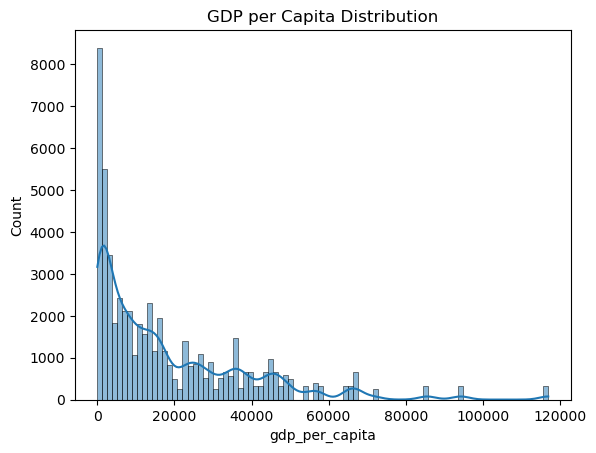

In [149]:
sns.histplot(df['gdp_per_capita'], kde=True)
plt.title('GDP per Capita Distribution')
plt.show()

##### (b) **Scatter Plot**

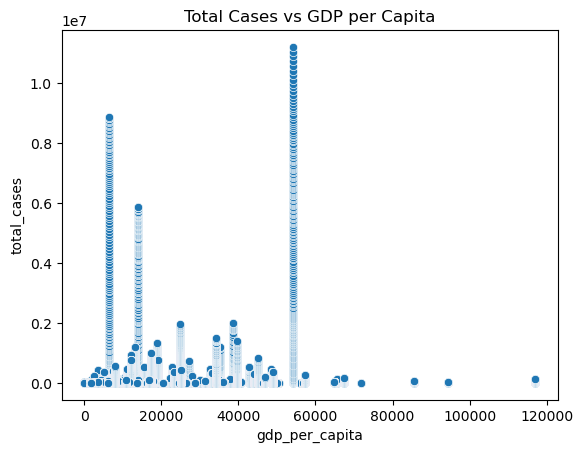

In [153]:
sns.scatterplot(data=df, x='gdp_per_capita', y='total_cases')
plt.title('Total Cases vs GDP per Capita')
plt.show()

##### (c) **Pairplot**

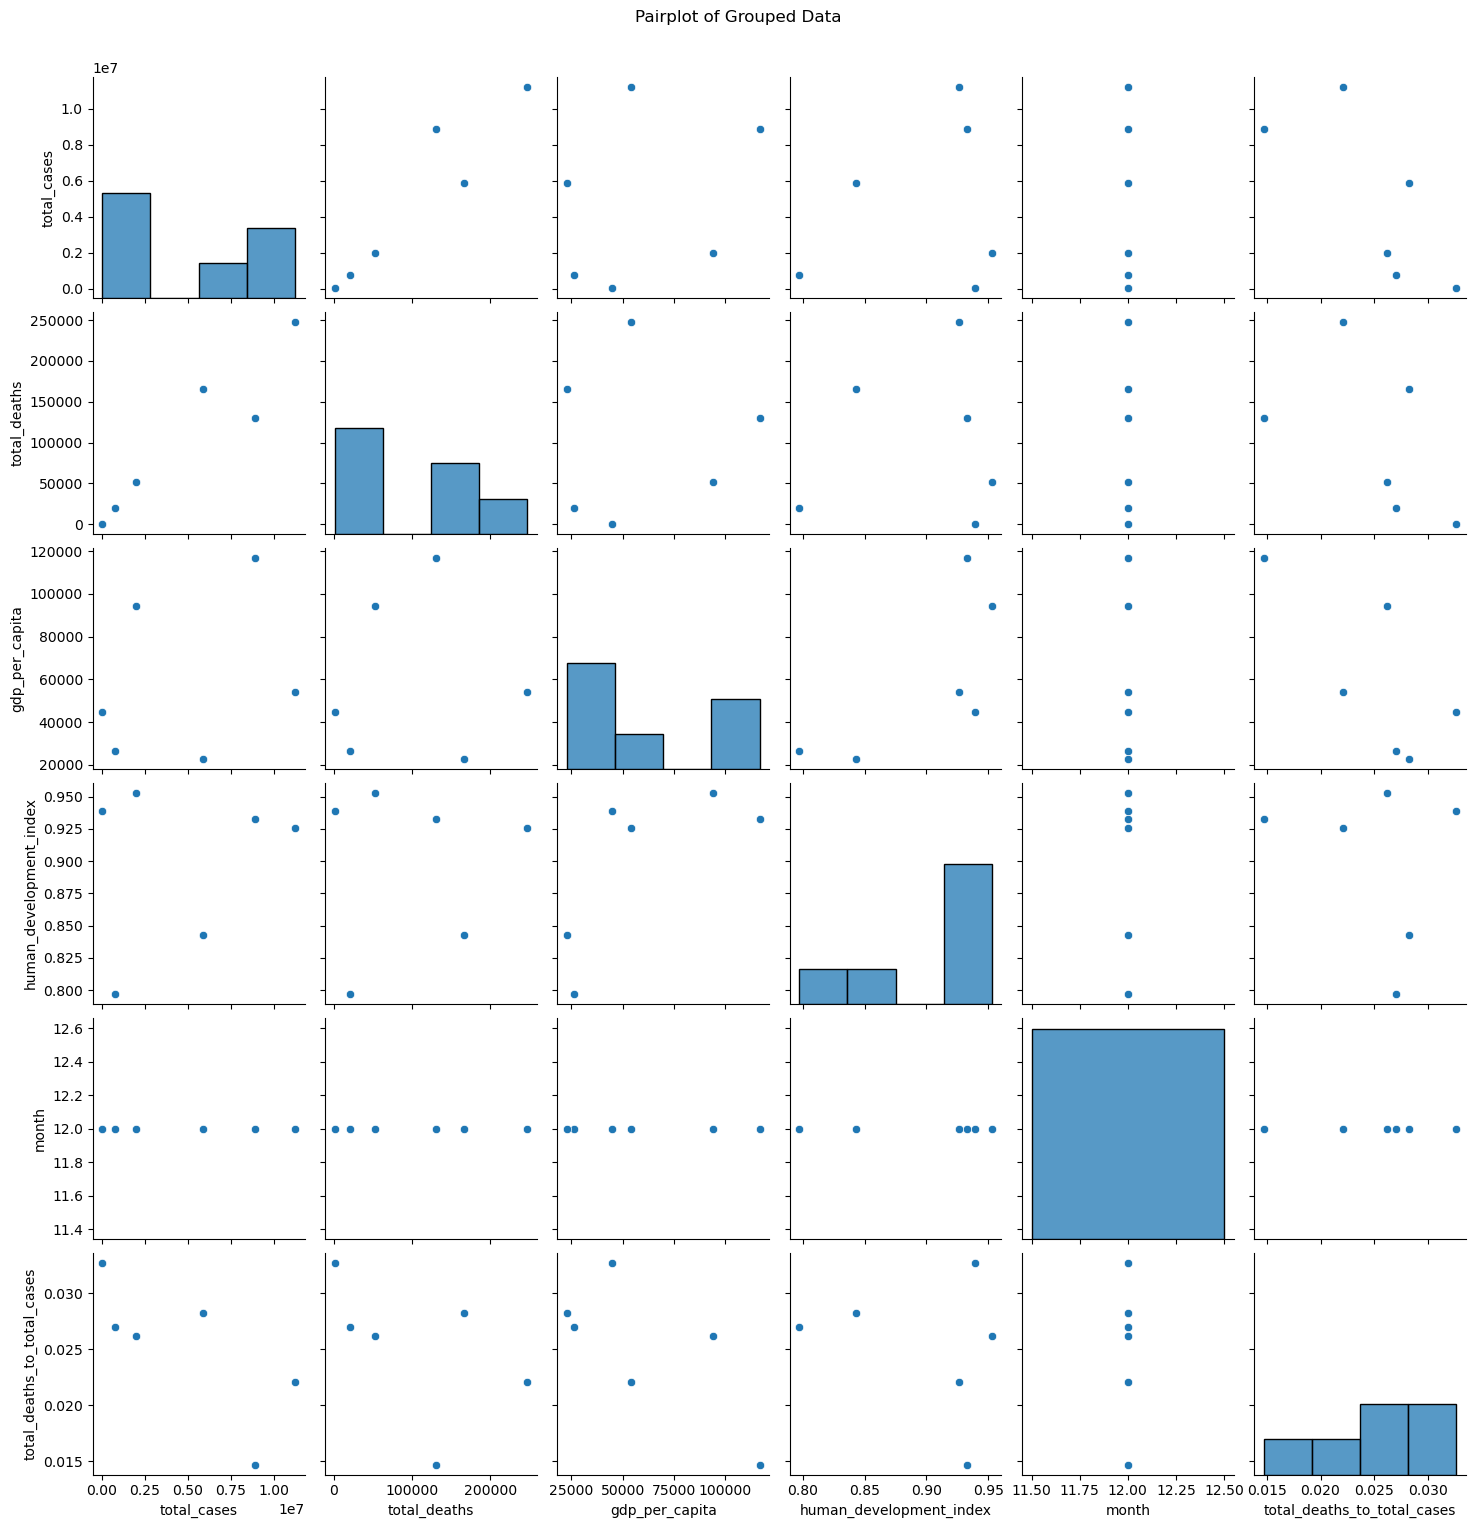

In [156]:
sns.pairplot(df_groupby)
plt.suptitle("Pairplot of Grouped Data", y=1.02)
plt.show()

##### (d) **Bar Plot**

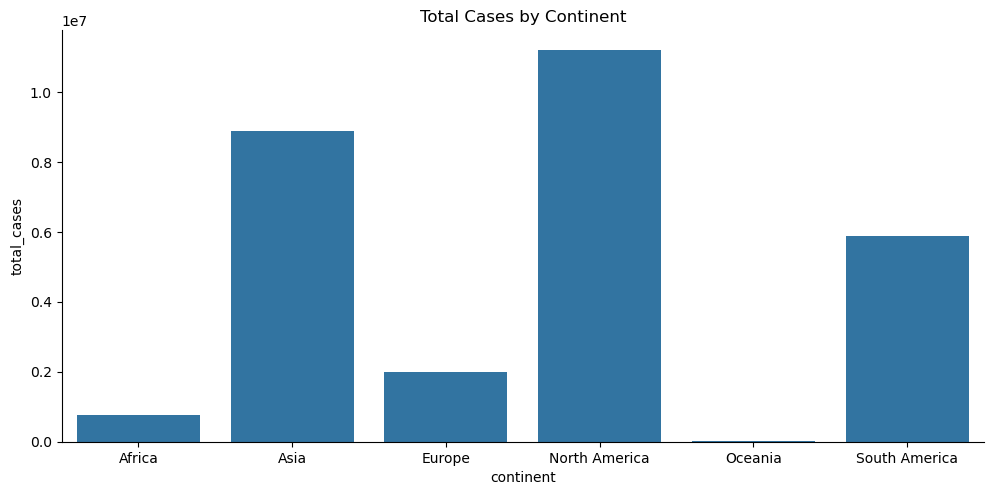

In [172]:
sns.catplot(data=df_groupby, kind='bar', x='continent', y='total_cases', height=5, aspect=2)
plt.title('Total Cases by Continent')
plt.show()

#### **Step 10:** Save Final DataFrame
##### Save to CSV

In [166]:
df_groupby.to_csv('covid_groupby.csv', index=False)
print("File saved as covid_groupby.csv")

File saved as covid_groupby.csv
